In [3]:
try:
    from Bio import AlignIO
    from Bio.Align import AlignInfo
except ModuleNotFoundError:
    print("Biopython is not installed or cannot be imported.")
    print("Please install Biopython using: pip install biopython")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def calculate_identity(alignment):
    summary = AlignInfo.SummaryInfo(alignment)
    consensus = summary.dumb_consensus()
    alignment_len = alignment.get_alignment_length()
    
    identities = []
    for record in alignment:
        seq = str(record.seq)
        identity = sum(1 for a, b in zip(seq, consensus) if a == b) / alignment_len * 100
        identities.append((record.id, len(seq), identity))
    
    return identities

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment:
        print(f"Alignment loaded from file: {alignment_file}")
        print(f"Alignment length: {alignment.get_alignment_length()}")

        identities = calculate_identity(alignment)
        for record_id, seq_len, identity in identities:
            print(f"Sequence {record_id}: Length = {seq_len}, Identity = {identity:.2f}%")

        # Print sequences and their IDs
        for record in alignment:
            print(f">{record.id}")
            print(record.seq)
            print()  # Print an empty line for separation
    else:
        print("Failed to load the alignment.")

if __name__ == "__main__":
    main()

Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Alignment length: 197
Sequence original_humancys: Length = 197, Identity = 76.65%
Sequence original_mousecys: Length = 197, Identity = 75.63%
>original_humancys
PQNRKVDCNKGVTGTIYEYGALTLNGEEYIQFKQFAGKHVLFVNVAAYCGLAAQYPELNALQEELKNFGVIVLAFPCNQFGKQEPGTNSEILLGLKYVCPGSGFVPSFQLFEKGDVNGEKEQKVFTFLKNSCPPTSDLLGSSSQLFWEPMKVHDIRWNFEKFLVGPDGVPVMHWFHQAPVSTVKSDILEYLKQFNTH

>original_mousecys
PQKSKVDCNKGVTGTVYEYGANTIDGGEFVNFQQYAGKHILFVNVASFCGLTATYPELNTLQEELKPFNVTVLGFPCNQFGKQEPGKNSEILLGLKYVRPGGGYVPNFQLFEKGDVNGDNEQKVFSFLKNSCPPTSELFGSPEHLFWDPMKVHDIRWNFEKFLVGPDGVPVMRWFHHTPVRIVQSDIMEYLNQTS--



/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/Bio/Align/AlignInfo.py:63: BiopythonDeprecationWarning: The `dumb_consensus` method is deprecated and will be removed in a future release of Biopython. As an alternative, you can convert the multiple sequence alignment object to a new-style Alignment object by via its `.alignment` property, and then create a Motif object. You can then use the `.consensus` or `.degenerate_consensus` property of the Motif object to get a consensus sequence. For more control over how the consensus sequence is calculated, you can call the `calculate_consensus` method on the `.counts` property of the Motif object. This is an example for a multiple sequence alignment `msa` of DNA nucleotides:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> from Bio.Align.AlignInfo import SummaryInfo
>>> msa = MultipleSeqAlignment([SeqRecord(Seq('ACGT')),
...                             SeqRecord(S

In [1]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# Define the sequences
seq1 = SeqRecord(Seq("PQNRKVDCNKGVTGTIYEYGALTLNGEEYIQFKQFAGKHVLFVNVAAYCGLAAQYPELNALQEELKNFGVIVLAFPCNQFGKQEPGTNSEILLGLKYVCPGSGFVPSFQLFEKGDVNGEKEQKVFTFLKNSCPPTSDLLGSSSQLFWEPMKVHDIRWNFEKFLVGPDGVPVMHWFHQAPVSTVKSDILEYLKQFNTH"),
                 id="original_humancys", description="")
seq2 = SeqRecord(Seq("PQKSKVDCNKGVTGTVYEYGANTIDGGEFVNFQQYAGKHILFVNVASFCGLTATYPELNTLQEELKPFNVTVLGFPCNQFGKQEPGKNSEILLGLKYVRPGGGYVPNFQLFEKGDVNGDNEQKVFSFLKNSCPPTSELFGSPEHLFWDPMKVHDIRWNFEKFLVGPDGVPVMRWFHHTPVRIVQSDIMEYLNQTS--"),
                 id="original_mousecys", description="")

# Write the sequences to a FASTA file
with open("sequences.fasta", "w") as output_handle:
    SeqIO.write([seq1, seq2], output_handle, "fasta")

print("Sequences have been written to sequences.fasta")


Sequences have been written to sequences.fasta


In [6]:
import subprocess
from Bio.Blast import NCBIXML

# Path to the sequences FASTA file
fasta_file = "sequences.fasta"

# Read the sequences from the FASTA file and separate them
with open(fasta_file, "r") as file:
    contents = file.read()

sequences = contents.split('>')[1:]  # Split on '>' and ignore the first empty element
sequence_dict = {}

for sequence in sequences:
    lines = sequence.split('\n')
    header = lines[0]
    seq = ''.join(lines[1:])
    sequence_dict[header] = seq

# Extract the sequences (assuming there are exactly two)
seq1_header, seq2_header = list(sequence_dict.keys())
seq1 = sequence_dict[seq1_header]
seq2 = sequence_dict[seq2_header]

# Write sequences to individual FASTA files
with open("seq1.fasta", "w") as file1:
    file1.write(f">{seq1_header}\n{seq1}\n")

with open("seq2.fasta", "w") as file2:
    file2.write(f">{seq2_header}\n{seq2}\n")

# Define the BLASTP command
blastp_command = [
    "blastp",
    "-query", "seq1.fasta",
    "-subject", "seq2.fasta",
    "-outfmt", "5",
    "-out", "blast_result.xml"
]

# Run the BLASTP command using subprocess
try:
    result = subprocess.run(blastp_command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(result.stdout.decode())  # Output from BLASTP command
except subprocess.CalledProcessError as e:
    print("Error during BLASTP execution:")
    print(e.stderr.decode())  # Error from BLASTP command
except FileNotFoundError:
    print("BLASTP command not found. Please ensure BLAST+ is installed and accessible in your PATH.")
    exit(1)

# Parse BLAST results using Biopython
with open("blast_result.xml") as result_handle:
    blast_record = NCBIXML.read(result_handle)

# Print results
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        print("****Alignment****")
        print("sequence:", alignment.title)
        print("length:", alignment.length)
        print("e value:", hsp.expect)
        print(hsp.query)
        print(hsp.match)
        print(hsp.sbjct)



****Alignment****
sequence: original_mousecys original_mousecys
length: 195
e value: 9.91801e-119
PQNRKVDCNKGVTGTIYEYGALTLNGEEYIQFKQFAGKHVLFVNVAAYCGLAAQYPELNALQEELKNFGVIVLAFPCNQFGKQEPGTNSEILLGLKYVCPGSGFVPSFQLFEKGDVNGEKEQKVFTFLKNSCPPTSDLLGSSSQLFWEPMKVHDIRWNFEKFLVGPDGVPVMHWFHQAPVSTVKSDILEYLKQ
PQ  KVDCNKGVTGT+YEYGA T++G E++ F+Q+AGKH+LFVNVA++CGL A YPELN LQEELK F V VL FPCNQFGKQEPG NSEILLGLKYV PG G+VP+FQLFEKGDVNG+ EQKVF+FLKNSCPPTS+L GS   LFW+PMKVHDIRWNFEKFLVGPDGVPVM WFH  PV  V+SDI+EYL Q
PQKSKVDCNKGVTGTVYEYGANTIDGGEFVNFQQYAGKHILFVNVASFCGLTATYPELNTLQEELKPFNVTVLGFPCNQFGKQEPGKNSEILLGLKYVRPGGGYVPNFQLFEKGDVNGDNEQKVFSFLKNSCPPTSELFGSPEHLFWDPMKVHDIRWNFEKFLVGPDGVPVMRWFHHTPVRIVQSDIMEYLNQ


In [7]:
from Bio.Seq import Seq
from Bio.SeqUtils import seq3

# Define amino acid properties
aa_properties = {
    'A': {'hydrophobicity': 1.8, 'charge': 0},
    'R': {'hydrophobicity': -4.5, 'charge': +1},
    'N': {'hydrophobicity': -3.5, 'charge': 0},
    'D': {'hydrophobicity': -3.5, 'charge': -1},
    'C': {'hydrophobicity': 2.5, 'charge': 0},
    'E': {'hydrophobicity': -3.5, 'charge': -1},
    'Q': {'hydrophobicity': -3.5, 'charge': 0},
    'G': {'hydrophobicity': -0.4, 'charge': 0},
    'H': {'hydrophobicity': -3.2, 'charge': +1},
    'I': {'hydrophobicity': 4.5, 'charge': 0},
    'K': {'hydrophobicity': -3.9, 'charge': +1},
    'L': {'hydrophobicity': 3.8, 'charge': 0},
    'M': {'hydrophobicity': 1.9, 'charge': 0},
    'F': {'hydrophobicity': 2.8, 'charge': 0},
    'P': {'hydrophobicity': -1.6, 'charge': 0},
    'S': {'hydrophobicity': -0.8, 'charge': 0},
    'T': {'hydrophobicity': -0.7, 'charge': 0},
    'W': {'hydrophobicity': -0.9, 'charge': 0},
    'Y': {'hydrophobicity': -1.3, 'charge': 0},
    'V': {'hydrophobicity': 4.2, 'charge': 0}
}

def get_aa_properties(aa):
    return aa_properties.get(aa, {'hydrophobicity': None, 'charge': None})

# Define mutation data
mutations = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S'), (196, 'T', '-'), (197, 'H', '-')
]

# Example sequences
seq1 = "PQNRKVDCNKGVTGTIYEYGALTLNGEEYIQFKQFAGKHVLFVNVAAYCGLAAQYPELNALQEELKNFGVIVLAFPCNQFGKQEPGTNSEILLGLKYVCPGSGFVPSFQLFEKGDVNGEKEQKVFTFLKNSCPPTSDLLGSSSQLFWEPMKVHDIRWNFEKFLVGPDGVPVMHWFHQAPVSTVKSDILEYLKQFNTH"
seq2 = "PQKSKVDCNKGVTGTVYEYGANTIDGGEFVNFQQYAGKHILFVNVASFCGLTATYPELNTLQEELKPFNVTVLGFPCNQFGKQEPGKNSEILLGLKYVRPGGGYVPNFQLFEKGDVNGDNEQKVFSFLKNSCPPTSELFGSPEHLFWDPMKVHDIRWNFEKFLVGPDGVPVMRWFHHTPVRIVQSDIMEYLNQTS--"

# Analyze mutations
for position, aa1, aa2 in mutations:
    aa1_properties = get_aa_properties(aa1)
    aa2_properties = get_aa_properties(aa2)
    
    print(f"Position {position}:")
    print(f"  Sequence 1 - {aa1} Properties: {aa1_properties}")
    print(f"  Sequence 2 - {aa2} Properties: {aa2_properties}")

    if '-' in [aa1, aa2]:
        print(f"  Note: One of the sequences has a gap ('-').")

    print()


Position 3:
  Sequence 1 - N Properties: {'hydrophobicity': -3.5, 'charge': 0}
  Sequence 2 - K Properties: {'hydrophobicity': -3.9, 'charge': 1}

Position 4:
  Sequence 1 - R Properties: {'hydrophobicity': -4.5, 'charge': 1}
  Sequence 2 - S Properties: {'hydrophobicity': -0.8, 'charge': 0}

Position 16:
  Sequence 1 - I Properties: {'hydrophobicity': 4.5, 'charge': 0}
  Sequence 2 - V Properties: {'hydrophobicity': 4.2, 'charge': 0}

Position 22:
  Sequence 1 - L Properties: {'hydrophobicity': 3.8, 'charge': 0}
  Sequence 2 - N Properties: {'hydrophobicity': -3.5, 'charge': 0}

Position 24:
  Sequence 1 - L Properties: {'hydrophobicity': 3.8, 'charge': 0}
  Sequence 2 - I Properties: {'hydrophobicity': 4.5, 'charge': 0}

Position 25:
  Sequence 1 - N Properties: {'hydrophobicity': -3.5, 'charge': 0}
  Sequence 2 - D Properties: {'hydrophobicity': -3.5, 'charge': -1}

Position 27:
  Sequence 1 - E Properties: {'hydrophobicity': -3.5, 'charge': -1}
  Sequence 2 - G Properties: {'hydrop

In [12]:
try:
    from Bio import AlignIO
except ModuleNotFoundError:
    print("Biopython is not installed or cannot be imported.")
    print("Please install Biopython using: pip install biopython")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def find_different_positions(seq1, seq2):
    differences = []
    for i, (res1, res2) in enumerate(zip(seq1, seq2)):
        if res1 != res2:
            differences.append((i + 1, res1, res2))  # i + 1 to convert to 1-based position
    return differences

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment and len(alignment) == 2:
        print(f"Alignment loaded from file: {alignment_file}")
        
        seq1 = str(alignment[0].seq)
        seq2 = str(alignment[1].seq)

        # Find positions with different amino acids
        differences = find_different_positions(seq1, seq2)

        if differences:
            print("Differences:")
            for pos, res1, res2 in differences:
                print(f"Position {pos}: Sequence 1 - {res1}, Sequence 2 - {res2}")
        else:
            print("No differences found between the two sequences.")
    else:
        print("Alignment could not be loaded or does not contain exactly two sequences.")

if __name__ == "__main__":
    main()

File not found: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Alignment could not be loaded or does not contain exactly two sequences.


Alignment loaded from file: /home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln
Differences found at positions: [3, 4, 16, 22, 24, 25, 27, 29, 30, 31, 33, 35, 40, 47, 48, 52, 54, 60, 67, 69, 71, 74, 87, 99, 102, 104, 107, 119, 120, 126, 137, 139, 142, 143, 144, 148, 173, 177, 178, 181, 182, 184, 188, 192, 194, 195, 196, 197]
Plot saved to: differences_plot.png


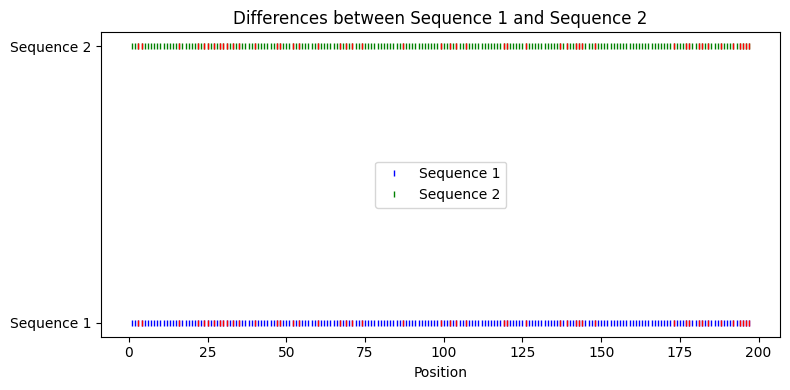

In [5]:
try:
    from Bio import AlignIO
    import matplotlib.pyplot as plt
except ModuleNotFoundError as e:
    print(f"Error importing module: {e}")
    print("Please make sure Biopython and matplotlib are installed.")
    exit()

def read_clustal_alignment(alignment_file):
    try:
        alignment = AlignIO.read(alignment_file, "clustal")
        return alignment
    except FileNotFoundError:
        print(f"File not found: {alignment_file}")
    except ValueError as ve:
        print(f"Error reading alignment: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

def find_different_positions(seq1, seq2):
    differences = []
    for i, (res1, res2) in enumerate(zip(seq1, seq2)):
        if res1 != res2:
            differences.append(i + 1)  # i + 1 to convert to 1-based position
    return differences

def plot_differences(seq1, seq2, differences, output_file=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.plot(range(1, len(seq1) + 1), [1] * len(seq1), '|', color='blue', markersize=5, label='Sequence 1')
    ax.plot(range(1, len(seq2) + 1), [2] * len(seq2), '|', color='green', markersize=5, label='Sequence 2')
    
    for pos in differences:
        ax.plot(pos, 1, '|', color='red', markersize=5)
        ax.plot(pos, 2, '|', color='red', markersize=5)
    
    ax.set_yticks([1, 2])
    ax.set_yticklabels(['Sequence 1', 'Sequence 2'])
    ax.set_xlabel('Position')
    ax.set_title('Differences between Sequence 1 and Sequence 2')
    ax.legend(loc='center')  # Center the legend

    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {output_file}")
    else:
        plt.show()

def main():
    alignment_file = "/home/hp/nayanika/github/PhD_Thesis/EVB/protein_stepwise/GPX6MUT/alignment.aln"  # Replace with your Clustal format alignment file path

    alignment = read_clustal_alignment(alignment_file)

    if alignment and len(alignment) == 2:
        print(f"Alignment loaded from file: {alignment_file}")
        
        seq1 = str(alignment[0].seq)
        seq2 = str(alignment[1].seq)

        # Find positions with different amino acids
        differences = find_different_positions(seq1, seq2)

        if differences:
            print(f"Differences found at positions: {differences}")
            output_file = "differences_plot.png"  # Replace with your desired output file path
            plot_differences(seq1, seq2, differences, output_file)
        else:
            print("No differences found between the two sequences.")
    else:
        print("Alignment could not be loaded or does not contain exactly two sequences.")

if __name__ == "__main__":
    main()

In [53]:
from Bio.PDB import PDBParser

pdb_file = "original_mousecys.pdb"

def print_residues(structure):
    for model in structure:
        for chain in model:
            print(f"Chain ID: {chain.id}")
            for residue in chain:
                print(f"Residue: {residue.id}: {residue.resname}")

# Parse PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("PDB", pdb_file)

# Print residues for each chain
print_residues(structure)


Chain ID: X
Residue: (' ', 1, ' '): PRO
Residue: (' ', 2, ' '): GLN
Residue: (' ', 3, ' '): LYS
Residue: (' ', 4, ' '): SER
Residue: (' ', 5, ' '): LYS
Residue: (' ', 6, ' '): VAL
Residue: (' ', 7, ' '): ASP
Residue: (' ', 8, ' '): CYX
Residue: (' ', 9, ' '): ASN
Residue: (' ', 10, ' '): LYS
Residue: (' ', 11, ' '): GLY
Residue: (' ', 12, ' '): VAL
Residue: (' ', 13, ' '): THR
Residue: (' ', 14, ' '): GLY
Residue: (' ', 15, ' '): THR
Residue: (' ', 16, ' '): VAL
Residue: (' ', 17, ' '): TYR
Residue: (' ', 18, ' '): GLU
Residue: (' ', 19, ' '): TYR
Residue: (' ', 20, ' '): GLY
Residue: (' ', 21, ' '): ALA
Residue: (' ', 22, ' '): ASN
Residue: (' ', 23, ' '): THR
Residue: (' ', 24, ' '): ILE
Residue: (' ', 25, ' '): ASP
Residue: (' ', 26, ' '): GLY
Residue: (' ', 27, ' '): GLY
Residue: (' ', 28, ' '): GLU
Residue: (' ', 29, ' '): PHE
Residue: (' ', 30, ' '): VAL
Residue: (' ', 31, ' '): ASN
Residue: (' ', 32, ' '): PHE
Residue: (' ', 33, ' '): GLN
Residue: (' ', 34, ' '): GLN
Residue: ('

In [57]:
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionException

pdb_file = "original_mousecys.pdb"

def print_chain_x_residues(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("PDB", pdb_file)

    for model in structure:
        chains = model.get_chains()
        print(f"Chains in Model {model.id}: {[chain.id for chain in chains]}")
        
        try:
            chain_x = model['X']  # Access chain 'X' instead of 'A'
            print(f"Residues in Chain X:")
            for residue in chain_x:
                print(f"Residue {residue.id}: {residue.resname}")
        except KeyError:
            print("Chain X not found in this model.")

# Print details of residues in chain X
print_chain_x_residues(pdb_file)


Chains in Model 0: ['X']
Residues in Chain X:
Residue (' ', 1, ' '): PRO
Residue (' ', 2, ' '): GLN
Residue (' ', 3, ' '): LYS
Residue (' ', 4, ' '): SER
Residue (' ', 5, ' '): LYS
Residue (' ', 6, ' '): VAL
Residue (' ', 7, ' '): ASP
Residue (' ', 8, ' '): CYX
Residue (' ', 9, ' '): ASN
Residue (' ', 10, ' '): LYS
Residue (' ', 11, ' '): GLY
Residue (' ', 12, ' '): VAL
Residue (' ', 13, ' '): THR
Residue (' ', 14, ' '): GLY
Residue (' ', 15, ' '): THR
Residue (' ', 16, ' '): VAL
Residue (' ', 17, ' '): TYR
Residue (' ', 18, ' '): GLU
Residue (' ', 19, ' '): TYR
Residue (' ', 20, ' '): GLY
Residue (' ', 21, ' '): ALA
Residue (' ', 22, ' '): ASN
Residue (' ', 23, ' '): THR
Residue (' ', 24, ' '): ILE
Residue (' ', 25, ' '): ASP
Residue (' ', 26, ' '): GLY
Residue (' ', 27, ' '): GLY
Residue (' ', 28, ' '): GLU
Residue (' ', 29, ' '): PHE
Residue (' ', 30, ' '): VAL
Residue (' ', 31, ' '): ASN
Residue (' ', 32, ' '): PHE
Residue (' ', 33, ' '): GLN
Residue (' ', 34, ' '): GLN
Residue (' 

In [82]:
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionException
import numpy as np

def calculate_distances_from_residue(pdb_file, ref_residue_id, target_residue_ids, chain_id='X'):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("PDB", pdb_file)

    try:
        model = structure[0]  # Assuming we are working with the first model
        chain = model[chain_id]

        try:
            reference_residue = chain[ref_residue_id]
            ref_coord = reference_residue['CA'].get_coord()  # Using CA atom as reference
        except KeyError as e:
            print(f"Error with reference residue {ref_residue_id}: {e}")
            return None

        distances = {}

        for target_residue_id in target_residue_ids:
            try:
                target_residue = chain[target_residue_id]
                target_coord = target_residue['CA'].get_coord()
                distance = np.linalg.norm(target_coord - ref_coord)
                distances[target_residue_id] = distance
            except KeyError as e:
                print(f"Error with target residue {target_residue_id}: {e}")
                distances[target_residue_id] = None

        return distances

    except KeyError as e:
        print(f"Error: {e}")
        return None
    except PDBConstructionException as e:
        print(f"PDB Construction Error: {e}")
        return None

# Example usage: Calculate distances from residue 49 to the specified positions in chain 'X'
ref_residue_id = (' ', 49, ' ')
target_residue_ids = [
    (' ', 3, ' '), (' ', 4, ' '), (' ', 16, ' '), (' ', 22, ' '), (' ', 24, ' '),
    (' ', 25, ' '), (' ', 27, ' '), (' ', 29, ' '), (' ', 30, ' '), (' ', 31, ' '),
    (' ', 33, ' '), (' ', 35, ' '), (' ', 40, ' '), (' ', 47, ' '), (' ', 48, ' '),
    (' ', 52, ' '), (' ', 54, ' '), (' ', 60, ' '), (' ', 67, ' '), (' ', 69, ' '),
    (' ', 71, ' '), (' ', 74, ' '), (' ', 87, ' '), (' ', 99, ' '), (' ', 102, ' '),
    (' ', 104, ' '), (' ', 107, ' '), (' ', 119, ' '), (' ', 120, ' '), (' ', 126, ' '),
    (' ', 137, ' '), (' ', 139, ' '), (' ', 142, ' '), (' ', 143, ' '), (' ', 144, ' '),
    (' ', 148, ' '), (' ', 173, ' '), (' ', 177, ' '), (' ', 178, ' '), (' ', 181, ' '),
    (' ', 182, ' '), (' ', 184, ' '), (' ', 188, ' '), (' ', 192, ' '), (' ', 194, ' '),
    (' ', 195, ' '), (' ', 196, ' '), (' ', 197, ' ')
]

distances = calculate_distances_from_residue(pdb_file, ref_residue_id, target_residue_ids)

if distances is not None:
    # Print distances from residue 49 to the specified positions
    print(f"Distances from residue {ref_residue_id}:")
    for residue_id, distance in distances.items():
        if distance is not None:
            print(f"Residue {residue_id}: {distance:.2f} Angstroms")
        else:
            print(f"Residue {residue_id}: Distance calculation failed.")
else:
    print("Distance calculation failed.")


Error with target residue (' ', 196, ' '): (' ', 196, ' ')
Error with target residue (' ', 197, ' '): (' ', 197, ' ')
Distances from residue (' ', 49, ' '):
Residue (' ', 3, ' '): 21.63 Angstroms
Residue (' ', 4, ' '): 19.64 Angstroms
Residue (' ', 16, ' '): 27.12 Angstroms
Residue (' ', 22, ' '): 22.91 Angstroms
Residue (' ', 24, ' '): 18.69 Angstroms
Residue (' ', 25, ' '): 20.70 Angstroms
Residue (' ', 27, ' '): 24.28 Angstroms
Residue (' ', 29, ' '): 26.66 Angstroms
Residue (' ', 30, ' '): 26.67 Angstroms
Residue (' ', 31, ' '): 28.12 Angstroms
Residue (' ', 33, ' '): 30.54 Angstroms
Residue (' ', 35, ' '): 28.03 Angstroms
Residue (' ', 40, ' '): 23.17 Angstroms
Residue (' ', 47, ' '): 5.59 Angstroms
Residue (' ', 48, ' '): 3.88 Angstroms
Residue (' ', 52, ' '): 5.20 Angstroms
Residue (' ', 54, ' '): 10.00 Angstroms
Residue (' ', 60, ' '): 19.05 Angstroms
Residue (' ', 67, ' '): 30.74 Angstroms
Residue (' ', 69, ' '): 27.97 Angstroms
Residue (' ', 71, ' '): 23.11 Angstroms
Residue 

In [ ]:
import matplotlib.pyplot as plt

# Data provided
residue_numbers = [3, 4, 16, 22, 24, 25, 27, 29, 30, 31,
                   33, 35, 40, 47, 48, 52, 54, 60, 67, 69,
                   71, 74, 87, 99, 102, 104, 107, 119, 120,
                   126, 137, 139, 142, 143, 144, 148, 173, 177,
                   178, 181, 182, 184, 188, 192, 194, 195]
distances = [21.63, 19.64, 27.12, 22.91, 18.69, 20.70, 24.28, 26.66, 26.67, 28.12,
             30.54, 28.03, 23.17, 5.59, 3.88, 5.20, 10.00, 19.05, 30.74, 27.97,
             23.11, 14.29, 16.44, 9.50, 16.77, 16.10, 19.80, 23.30, 22.14, 23.16,
             21.60, 16.28, 16.44, 15.29, 11.60, 20.84, 20.19, 11.51, 14.81, 19.54,
             20.11, 21.90, 27.64, 33.41, 34.61, 35.43]

# Reference residue 49
ref_residue = 49

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(residue_numbers, distances, marker='o', linestyle='-', color='b', markersize=8, label='Distance from 49')
plt.axvline(x=ref_residue, color='r', linestyle='--', label=f'Residue {ref_residue}')
plt.xlabel('Residue Number')
plt.ylabel('Distance (Angstroms)')
plt.title(f'Distances from Residue {ref_residue} to Specific Residues')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

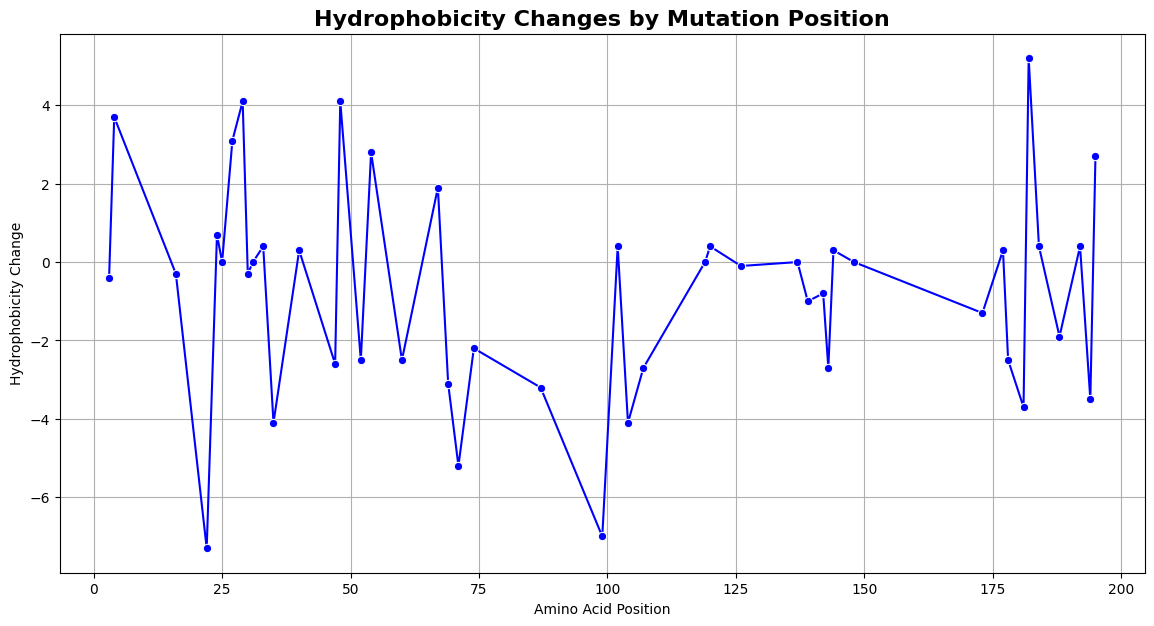

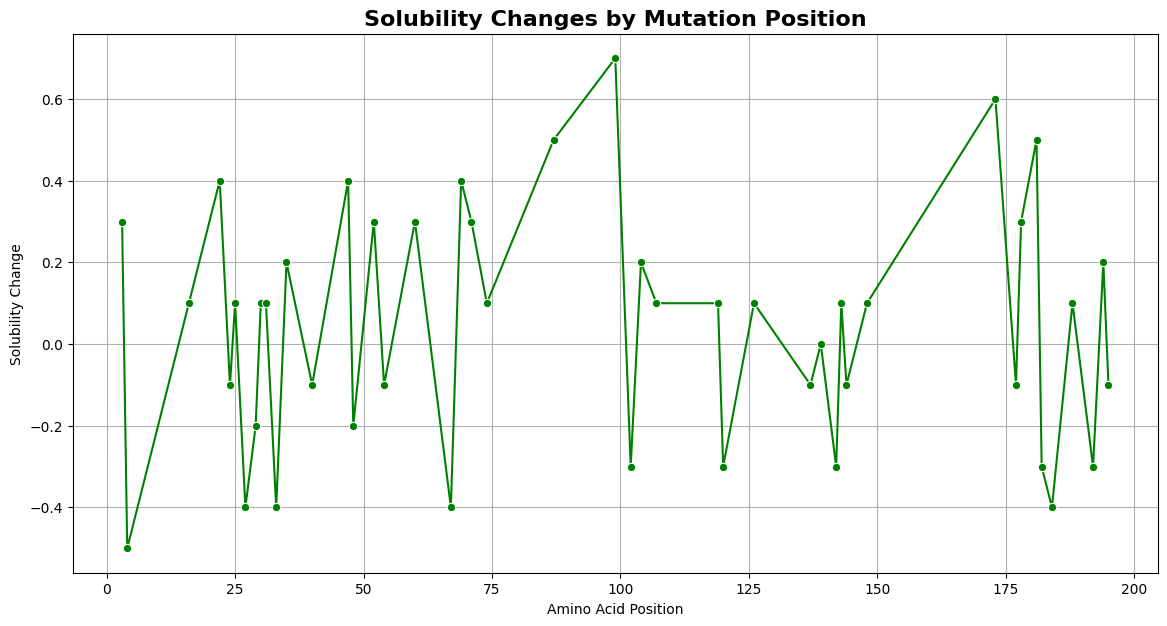

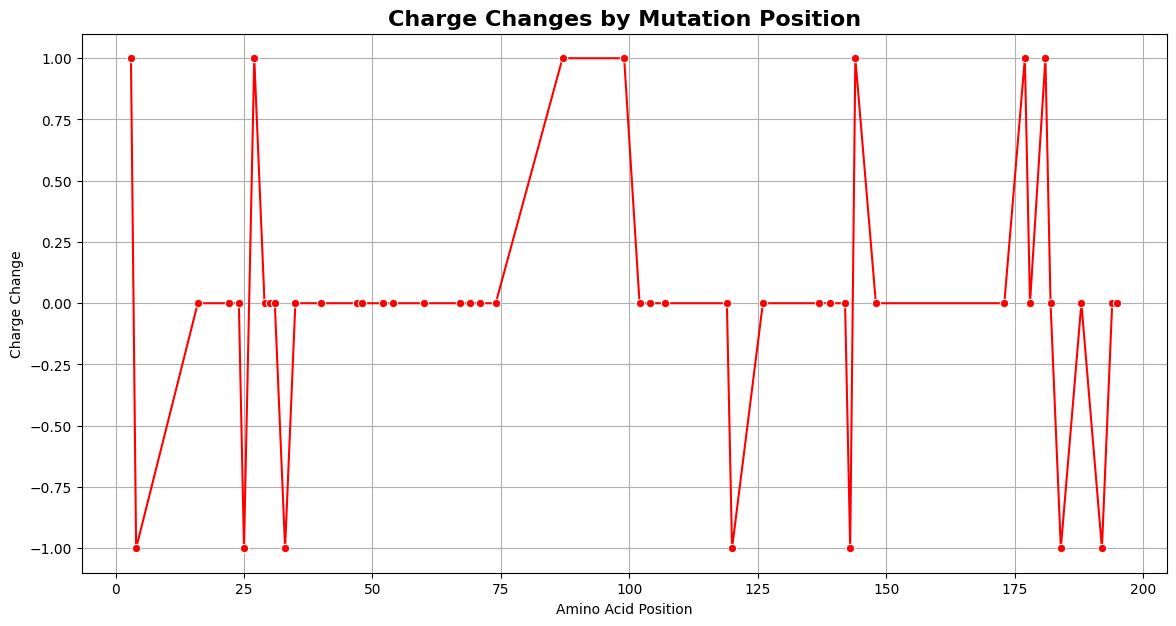

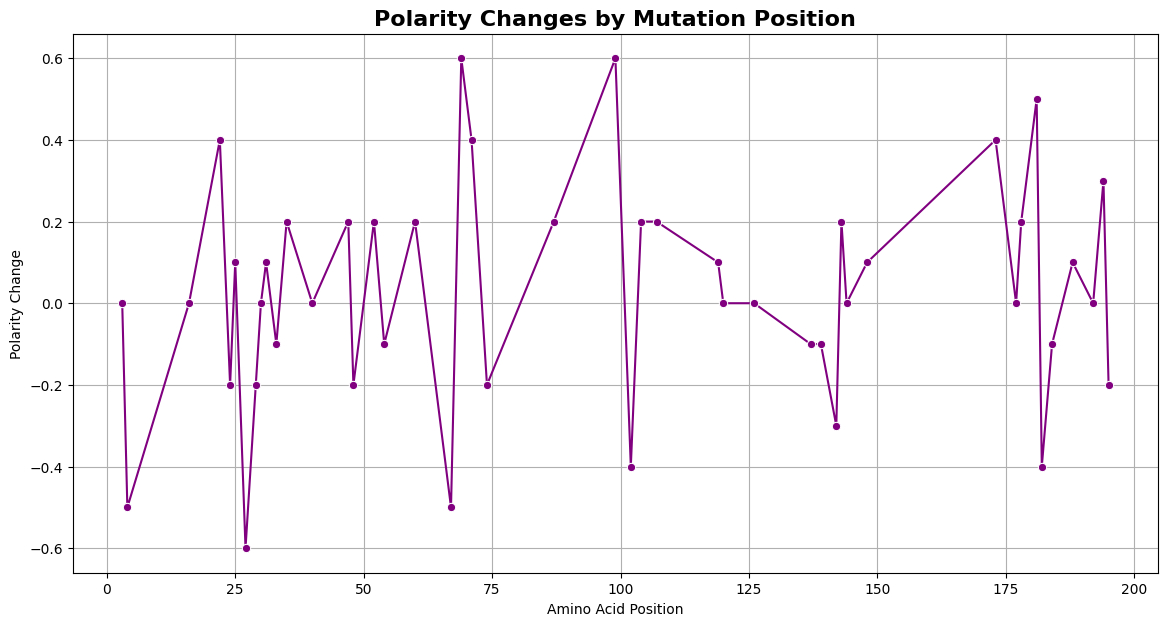

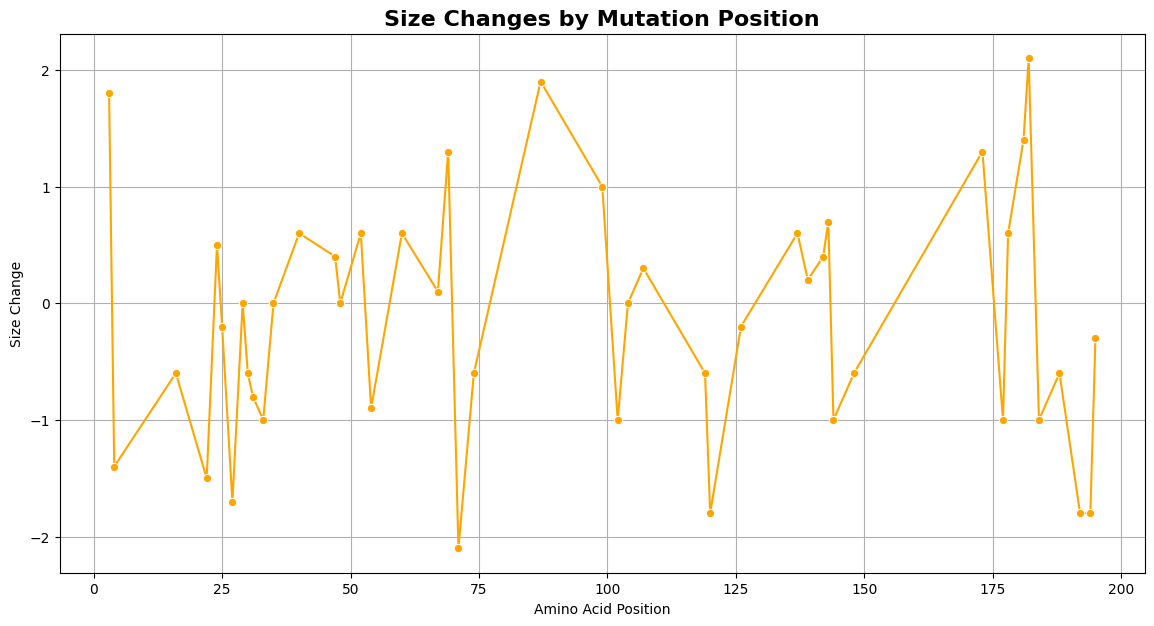

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

# Define properties for each amino acid
aa_properties = {
    'A': {'hydrophobicity': 1.8, 'solubility': 0.1, 'charge': 0, 'polarity': 0.3, 'size': 1.8},
    'R': {'hydrophobicity': -4.5, 'solubility': 1.0, 'charge': 1, 'polarity': 1.0, 'size': 3.6},
    'N': {'hydrophobicity': -3.5, 'solubility': 0.6, 'charge': 0, 'polarity': 0.7, 'size': 2.5},
    'D': {'hydrophobicity': -3.5, 'solubility': 0.7, 'charge': -1, 'polarity': 0.8, 'size': 2.3},
    'C': {'hydrophobicity': 2.5, 'solubility': 0.3, 'charge': 0, 'polarity': 0.4, 'size': 2.6},
    'E': {'hydrophobicity': -3.5, 'solubility': 0.6, 'charge': -1, 'polarity': 0.7, 'size': 2.9},
    'Q': {'hydrophobicity': -3.5, 'solubility': 0.5, 'charge': 0, 'polarity': 0.6, 'size': 3.3},
    'G': {'hydrophobicity': -0.4, 'solubility': 0.2, 'charge': 0, 'polarity': 0.1, 'size': 1.2},
    'H': {'hydrophobicity': -3.2, 'solubility': 0.4, 'charge': 1, 'polarity': 0.6, 'size': 2.3},
    'I': {'hydrophobicity': 4.5, 'solubility': 0.1, 'charge': 0, 'polarity': 0.1, 'size': 4.5},
    'K': {'hydrophobicity': -3.9, 'solubility': 0.9, 'charge': 1, 'polarity': 0.7, 'size': 4.3},
    'L': {'hydrophobicity': 3.8, 'solubility': 0.2, 'charge': 0, 'polarity': 0.3, 'size': 4.0},
    'M': {'hydrophobicity': 1.9, 'solubility': 0.3, 'charge': 0, 'polarity': 0.4, 'size': 3.4},
    'F': {'hydrophobicity': 2.8, 'solubility': 0.2, 'charge': 0, 'polarity': 0.2, 'size': 4.2},
    'P': {'hydrophobicity': -1.6, 'solubility': 0.2, 'charge': 0, 'polarity': 0.2, 'size': 2.6},
    'S': {'hydrophobicity': -0.8, 'solubility': 0.5, 'charge': 0, 'polarity': 0.5, 'size': 2.2},
    'T': {'hydrophobicity': -0.7, 'solubility': 0.4, 'charge': 0, 'polarity': 0.5, 'size': 2.4},
    'W': {'hydrophobicity': -0.9, 'solubility': 0.3, 'charge': 0, 'polarity': 0.3, 'size': 5.5},
    'Y': {'hydrophobicity': -1.3, 'solubility': 0.4, 'charge': 0, 'polarity': 0.4, 'size': 4.2},
    'V': {'hydrophobicity': 4.2, 'solubility': 0.2, 'charge': 0, 'polarity': 0.1, 'size': 3.9}
}

# Path to the positions file
positions_file = 'positions.txt'

# Read and parse the positions file
with open(positions_file, 'r') as file:
    lines = file.readlines()

# Initialize lists for property changes
positions = []
hydrophobicity_changes = []
solubility_changes = []
charge_changes = []
polarity_changes = []
size_changes = []

# Regex pattern to extract information from each line
pattern = re.compile(r"Position (\d+): Sequence 1 - (\w), Sequence 2 - (\w)")

# Process each line
for line in lines:
    match = pattern.match(line)
    if match:
        position, aa1, aa2 = match.groups()
        position = int(position)
        if aa1 in aa_properties and aa2 in aa_properties:
            # Calculate changes in properties
            hydrophobicity_change = aa_properties[aa2]['hydrophobicity'] - aa_properties[aa1]['hydrophobicity']
            solubility_change = aa_properties[aa2]['solubility'] - aa_properties[aa1]['solubility']
            charge_change = aa_properties[aa2]['charge'] - aa_properties[aa1]['charge']
            polarity_change = aa_properties[aa2]['polarity'] - aa_properties[aa1]['polarity']
            size_change = aa_properties[aa2]['size'] - aa_properties[aa1]['size']
            
            # Append changes to lists
            positions.append(position)
            hydrophobicity_changes.append(hydrophobicity_change)
            solubility_changes.append(solubility_change)
            charge_changes.append(charge_change)
            polarity_changes.append(polarity_change)
            size_changes.append(size_change)

# Create DataFrame for plotting
df = pd.DataFrame({
    'Position': positions,
    'Hydrophobicity Change': hydrophobicity_changes,
    'Solubility Change': solubility_changes,
    'Charge Change': charge_changes,
    'Polarity Change': polarity_changes,
    'Size Change': size_changes
})

# Plot Hydrophobicity Changes
plt.figure(figsize=(14, 7))
sns.lineplot(x='Position', y='Hydrophobicity Change', data=df, marker='o', color='blue')
plt.title('Hydrophobicity Changes by Mutation Position', fontsize=16, fontweight='bold')
plt.xlabel('Amino Acid Position')
plt.ylabel('Hydrophobicity Change')
plt.grid(True)
plt.savefig('hydrophobicity_changes_by_position.png', bbox_inches='tight')
plt.show()

# Plot Solubility Changes
plt.figure(figsize=(14, 7))
sns.lineplot(x='Position', y='Solubility Change', data=df, marker='o', color='green')
plt.title('Solubility Changes by Mutation Position', fontsize=16, fontweight='bold')
plt.xlabel('Amino Acid Position')
plt.ylabel('Solubility Change')
plt.grid(True)
plt.savefig('solubility_changes_by_position.png', bbox_inches='tight')
plt.show()

# Plot Charge Changes
plt.figure(figsize=(14, 7))
sns.lineplot(x='Position', y='Charge Change', data=df, marker='o', color='red')
plt.title('Charge Changes by Mutation Position', fontsize=16, fontweight='bold')
plt.xlabel('Amino Acid Position')
plt.ylabel('Charge Change')
plt.grid(True)
plt.savefig('charge_changes_by_position.png', bbox_inches='tight')
plt.show()

# Plot Polarity Changes
plt.figure(figsize=(14, 7))
sns.lineplot(x='Position', y='Polarity Change', data=df, marker='o', color='purple')
plt.title('Polarity Changes by Mutation Position', fontsize=16, fontweight='bold')
plt.xlabel('Amino Acid Position')
plt.ylabel('Polarity Change')
plt.grid(True)
plt.savefig('polarity_changes_by_position.png', bbox_inches='tight')
plt.show()

# Plot Size Changes
plt.figure(figsize=(14, 7))
sns.lineplot(x='Position', y='Size Change', data=df, marker='o', color='orange')
plt.title('Size Changes by Mutation Position', fontsize=16, fontweight='bold')
plt.xlabel('Amino Acid Position')
plt.ylabel('Size Change')
plt.grid(True)
plt.savefig('size_changes_by_position.png', bbox_inches='tight')
plt.show()
